<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/11_RF_profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U pandas-profiling

In [1]:
!pip install pandas-profiling==3.1.0

     |████████████████████████████████| 261 kB 11.1 MB/s 
     |████████████████████████████████| 3.1 MB 57.1 MB/s 
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
     |████████████████████████████████| 303 kB 47.7 MB/s 
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling jobl

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [ ]:
len(df.columns)

25

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df['PAY_AVR']=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

In [ ]:
df['BILL_AVR']=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [ ]:
df['AMT_AVR']=df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [ ]:
df_featured = df.drop(['SEX','ID', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [ ]:
df_featured.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default.payment.next.month', 'PAY_AVR', 'BILL_AVR', 'AMT_AVR'],
      dtype='object')

In [ ]:
columns = list(df_featured.columns)

In [ ]:
type(columns)

list

In [ ]:
columns = ['LIMIT_BAL',  'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AVR', 'BILL_AVR', 'AMT_AVR','default.payment.next.month']

In [ ]:
columns

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_AVR',
 'BILL_AVR',
 'AMT_AVR',
 'default.payment.next.month']

In [ ]:
df = df_featured[columns]

In [ ]:
df.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AVR', 'BILL_AVR',
       'AMT_AVR', 'default.payment.next.month'],
      dtype='object')

In [ ]:
df.describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_AVR,BILL_AVR,AMT_AVR,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.853133,1.551867,35.485500,-0.182439,44976.945200,5275.232094,0.221200
std,129747.661567,0.790349,0.521970,9.217904,0.982176,63260.721860,10137.946323,0.415062
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-56043.166667,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,28.000000,-0.833333,4781.333333,1113.291667,0.000000
50%,140000.000000,2.000000,2.000000,34.000000,0.000000,21051.833333,2397.166667,0.000000
75%,240000.000000,2.000000,2.000000,41.000000,0.000000,57104.416667,5583.916667,0.000000
max,1000000.000000,6.000000,3.000000,79.000000,6.000000,877313.833333,627344.333333,1.000000


In [ ]:
# df.profile_report()

In [ ]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

In [ ]:
#df.describe()

In [ ]:
X = df.drop('default.payment.next.month', axis =1).values
y = df['default.payment.next.month'].values
print(X.shape)
print(y.shape)

(30000, 7)
(30000,)


Split my data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

Instantiate the random forest model with 200 trees

In [ ]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [ ]:
y_predict = rf.predict(X_test)

Check feature importance


In [ ]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.29422164192587663, 'PAY_AVR'),
 (0.19973672905639028, 'AMT_AVR'),
 (0.19477790589338828, 'BILL_AVR'),
 (0.12674900931027133, 'AGE'),
 (0.122044934998974, 'LIMIT_BAL'),
 (0.038929352017879025, 'EDUCATION'),
 (0.02354042679722047, 'MARRIAGE')]

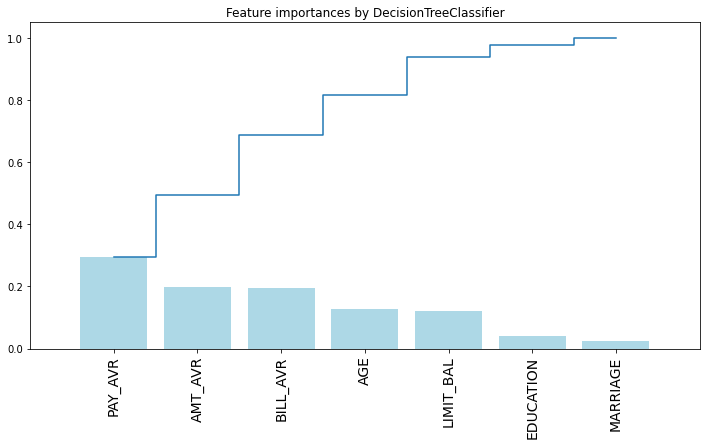

In [ ]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
X_test.shape

(9000, 7)

In [ ]:
#Make my predictions
y_prediction = rf.predict(X_test)

In [ ]:
y_probability = rf.predict_proba(X_test)

In [ ]:
y_probability.shape

(9000, 2)

In [ ]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.3127551020408163


In [ ]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.83      0.94      0.88      7040
     default       0.60      0.31      0.41      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [ ]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6639  401]
 [1347  613]]


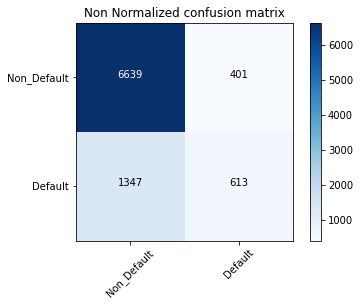

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')